2. (3 puntos) Hacer una función que diseñe filtros notch ideales, de Gauss o de Butterworth.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def kernel_ideal(M, N, centro, d0):
    u_k = centro[0]
    v_k = centro[1]
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u, v)
    
    D_k = np.square(U - 0.5 * M - u_k) + np.square(V - 0.5 * N - v_k)
    D_mk = np.square(U - 0.5 * M + u_k) + np.square(V - 0.5 * N + v_k)
    H_k = np.where(D_k <= d0**2, 0, 1) # Primer pasaaltos
    H_mk = np.where(D_mk <= d0**2, 0, 1) # Segundo pasaaltos
    kernel = H_k * H_mk
    
    return kernel

In [45]:
def kernel_gaussiano(M, N, centro, d0):
    u_k = centro[0]
    v_k = centro[1]
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u, v)
    
    D_k = np.square(U - 0.5 * M - u_k) + np.square(V - 0.5 * N - v_k)
    D_mk = np.square(U - 0.5 * M + u_k) + np.square(V - 0.5 * N + v_k)
    H_k = 1 - np.exp(-(0.5 / d0**2) * D_k) # Primer pasaaltos
    H_mk = 1 - np.exp(-(0.5 / d0**2) * D_mk) # Segundo pasaaltos
    kernel = H_k * H_mk
    
    return kernel

In [47]:
ker = kernel_gaussiano(500, 500, (100, -50), 5)

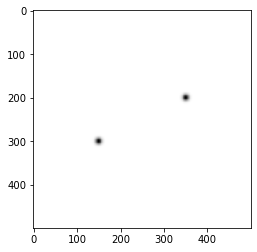

In [48]:
plt.imshow(ker, cmap = 'gray')

In [ ]:
def filtrar_notch(img, d0, tipo = 0, pasa = 0, centro = (0, 0), n = 0.0):
    """Filtro notch. 
    tipo = 0 para ideal, 1 para gaussiano y cualquier otro valor para butterworth.
    pasa = 0 para notchreject, 1 para notchpass.
    centro y radio son los del notch. notch simétrico automático.
    Especificar n solo para butterworth"""
    
    M, N = img.shape
    
    if tipo == 0:
        kernel = kernel_ideal(M, N, pasa, centro, radio, d0)
    else if tipo == 1:
        kernel = kernel_gaussiano(U, V, pasa, centro, radio, d0)
    else:
        kernel = kernel_butterworth(U, V, pasa, centro, radio, d0, n)
        
    transformada = np.fft.fftshift(np.fft.fft2(img))
    aplico_filtro = kernel * transformada
    img_filtrada = np.real(np.fft.ifft2(np.fft.ifftshift(aplico_filtro)))
    
    return img_filtrada